In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk
import plotly.express as px
import streamlit as st

In [2]:
data = pd.read_csv('./data/orders_main.csv')
data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At
0,#TS5851,punemanusha@gmail.com,paid,2022-02-10 13:04:53 +0530,unfulfilled,NaN,no,INR,499.0,80.0,...,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh,Andhra Pradesh,NaN,NaN,NaN
1,#TS5850,nayak.julluprakash@gmail.com,paid,2022-02-10 13:02:37 +0530,unfulfilled,NaN,yes,INR,849.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Odisha,Odisha,NaN,NaN,NaN
2,#TS5849,sayalee22gaikwad@gmail.com,paid,2022-02-10 11:51:18 +0530,unfulfilled,NaN,no,INR,650.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Maharashtra,Maharashtra,NaN,NaN,NaN
3,#TS5848,tejulokesh28@gmail.com,paid,2022-02-10 11:19:38 +0530,unfulfilled,NaN,yes,INR,650.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Karnataka,Karnataka,NaN,NaN,NaN
4,#TS5847,arathyarjun29@gmail.com,paid,2022-02-10 10:51:21 +0530,unfulfilled,NaN,yes,INR,499.0,80.0,...,NaN,NaN,NaN,NaN,NaN,Kerala,Kerala,NaN,NaN,NaN


In [6]:
rep_cust =data.groupby(by = ['Email'])['Email'].count()
rep_cust = pd.DataFrame(rep_cust)
#rep_cust.sort_values(by = ['Name'],ascending=False)
rep_cust.Email.unique

<bound method Series.unique of Email
007madhvendra@gmail.com          4
03rohitgaud@gmail.com            1
09bandodkar@gmail.com            1
14akshitagupta@gmail.com         1
18novakash@gmail.com             1
                                ..
zebazoya94@gmail.com             2
zeeshan.master2527@gmail.com     1
zenaida.dsouza@gmail.com        11
ziftkhar@gmail.com               2
zunaibshahana18@gmail.com        1
Name: Email, Length: 3972, dtype: int64>

In [120]:
def null_percentage(dataframe):
    """ This function outputs total null values in percentage"""
    null_percentage = (dataframe.isna().sum()/dataframe.shape[0]*100)
    return null_percentage

null_percentage(data['Billing Province Name'])

37.23860241589817

In [131]:
states= data.groupby(by = ['Billing Province Name'])['Billing Province Name'].count()
states = pd.DataFrame(states)
#states.reset_index()
states.head()
states.to_csv('./forecast_data/states.csv')



In [140]:
State = pd.read_csv('./forecast_data/states.csv')
State.head()

,Billing Province Name,province_count,latitude,longitude
0,Andaman and Nicobar Islands,3,11.667026,92.735983
1,Andhra Pradesh,271,14.750429,78.570026
2,Arunachal Pradesh,1,27.100399,93.616601
3,Assam,39,26.749981,94.216667
4,Bihar,24,25.785414,87.479973


In [134]:
st.columns

Index(['Billing Province Name', 'Billing Province Name.1'], dtype='object')

In [84]:
#data.dropna(inplace=True)

In [85]:
data.head(20)

,Name,Email,Accepts Marketing,Total,Lineitem quantity,Lineitem name,Lineitem sku,Billing City,Billing Zip,Billing Province,Shipping City,Shipping Zip,Shipping Province,Note Attributes
0,#TS5851,punemanusha@gmail.com,no,579.0,1,Personalised Unisex Sleek Wallet - Charcoal,TS12-USW-CHARCOAL,Rajahmundry,'533102,AP,Rajahmundry,'533102,AP,NaN
1,#TS5850,nayak.julluprakash@gmail.com,yes,849.0,1,Three Fold Unisex Wallet - Tan,TS13-3FUW-TAN,Bhubaneswar,'751001,OR,Bhubaneswar,'751001,OR,NaN
2,#TS5849,sayalee22gaikwad@gmail.com,no,650.0,1,Personalised Mens Wallet - Charcoal,TS14-MW-CHARCOAL,"Rasayani, Panvel",'410222,MH,"Rasayani, Panvel",'410222,MH,NaN
3,#TS5848,tejulokesh28@gmail.com,yes,650.0,1,Personalised Mens Wallet - Brown,TS14-MW-BROWN,Malur,'563160,KA,Malur,'563160,KA,NaN
4,#TS5847,arathyarjun29@gmail.com,yes,579.0,1,Personalised Unisex Sleek Wallet - Wine,TS12-USW-Wine,Kollam,'691001,KL,Kollam,'691001,KL,NaN
5,#TS5846,ritz051993@gmail.com,yes,1032.0,1,Personalised Passport Cover - set of 2,TS01-PC-SETOF2,Jammu,'180003,JK,Jammu,'180003,JK,NaN
6,#TS5845,annsneha305@gmail.com,yes,380.0,1,Personalised KeyChain - Green,TS10-KC-Green,Enadimangalam,'691556,KL,Enadimangalam,'691556,KL,NaN
7,#TS5844,mwilmadsouza@gmail.com,yes,750.0,1,Personalised A5 Diary - Tan,TS21-A5D-Tan,Mumbai,'400068,MH,Mumbai,'400068,MH,NaN
8,#TS5843,rajashreedesai05@gmail.com,no,685.0,1,Personalised Mens Wallet - Green,TS14-MW-Green,Pune,'411001,MH,Pune,'411001,MH,NaN
9,#TS5843,rajashreedesai05@gmail.com,NaN,NaN,1,Customization Cost for Personalised Mens Walle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
null_percentage(data)

Name                  0.000000
Email                 9.767502
Accepts Marketing    37.160670
Total                37.160670
Lineitem quantity     0.000000
Lineitem name         0.000000
Lineitem sku         17.911417
Billing City         37.225614
Billing Zip          37.251591
Billing Province     37.238602
Shipping City        37.160670
Shipping Zip         37.160670
Shipping Province    37.173659
Note Attributes      99.168723
dtype: float64

In [87]:
data.columns

Index(['Name', 'Email', 'Accepts Marketing', 'Total', 'Lineitem quantity',
       'Lineitem name', 'Lineitem sku', 'Billing City', 'Billing Zip',
       'Billing Province', 'Shipping City', 'Shipping Zip',
       'Shipping Province', 'Note Attributes'],
      dtype='object')

In [88]:
to_replace = '|'.join(['Personalised','Customization Cost for Personalised'])
data['Lineitem name'] = data['Lineitem name'].str.replace(to_replace,'')

C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\2471103871.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Lineitem name'] = data['Lineitem name'].str.replace(to_replace,'')


In [89]:
data = data.rename(columns = {'Total': 'Price','Lineitem quantity': 'Quantity','Lineitem name':'product_name','Lineitem sku':'Product_code','Billing City':'City'})
data.head()

,Name,Email,Accepts Marketing,Price,Quantity,product_name,Product_code,City,Billing Zip,Billing Province,Shipping City,Shipping Zip,Shipping Province,Note Attributes
0,#TS5851,punemanusha@gmail.com,no,579.0,1,Unisex Sleek Wallet - Charcoal,TS12-USW-CHARCOAL,Rajahmundry,'533102,AP,Rajahmundry,'533102,AP,NaN
1,#TS5850,nayak.julluprakash@gmail.com,yes,849.0,1,Three Fold Unisex Wallet - Tan,TS13-3FUW-TAN,Bhubaneswar,'751001,OR,Bhubaneswar,'751001,OR,NaN
2,#TS5849,sayalee22gaikwad@gmail.com,no,650.0,1,Mens Wallet - Charcoal,TS14-MW-CHARCOAL,"Rasayani, Panvel",'410222,MH,"Rasayani, Panvel",'410222,MH,NaN
3,#TS5848,tejulokesh28@gmail.com,yes,650.0,1,Mens Wallet - Brown,TS14-MW-BROWN,Malur,'563160,KA,Malur,'563160,KA,NaN
4,#TS5847,arathyarjun29@gmail.com,yes,579.0,1,Unisex Sleek Wallet - Wine,TS12-USW-Wine,Kollam,'691001,KL,Kollam,'691001,KL,NaN


In [90]:
to_replace = '|'.join(['Black','Brown','Charcoal','Tan','Cherry','Grey','Dark','Blue','Jeans Blue','Peach','Sky','Maroon','Orange','-',"JEANS BLUE", 'grey','set of 2'])
data['product_name'] = data['product_name'].str.replace(to_replace,'')

C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\2287369891.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['product_name'] = data['product_name'].str.replace(to_replace,'')


In [91]:
to_replace = '|'.join(['BLACK','BROWN','CHARCOAL','TAN','CHERRY','GREY','DARK','BLUE','JEANS BLUE','PEACH','SKY','MAROON','ORANGE','-',"JEANS BLUE", 'GREY','set of 2','Black','Brown','Charcoal','Tan','Cherry','Grey','Dark','Blue','Jeans Blue','Peach','Sky','Maroon','Orange','-',"JEANS BLUE", 'grey','set of 2'])
data['Product_code'] = data['Product_code'].str.replace(to_replace,'')

C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\4114513146.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Product_code'] = data['Product_code'].str.replace(to_replace,'')


In [92]:
data.head()

,Name,Email,Accepts Marketing,Price,Quantity,product_name,Product_code,City,Billing Zip,Billing Province,Shipping City,Shipping Zip,Shipping Province,Note Attributes
0,#TS5851,punemanusha@gmail.com,no,579.0,1,Unisex Sleek Wallet,TS12USW,Rajahmundry,'533102,AP,Rajahmundry,'533102,AP,NaN
1,#TS5850,nayak.julluprakash@gmail.com,yes,849.0,1,Three Fold Unisex Wallet,TS133FUW,Bhubaneswar,'751001,OR,Bhubaneswar,'751001,OR,NaN
2,#TS5849,sayalee22gaikwad@gmail.com,no,650.0,1,Mens Wallet,TS14MW,"Rasayani, Panvel",'410222,MH,"Rasayani, Panvel",'410222,MH,NaN
3,#TS5848,tejulokesh28@gmail.com,yes,650.0,1,Mens Wallet,TS14MW,Malur,'563160,KA,Malur,'563160,KA,NaN
4,#TS5847,arathyarjun29@gmail.com,yes,579.0,1,Unisex Sleek Wallet Wine,TS12USWWine,Kollam,'691001,KL,Kollam,'691001,KL,NaN


In [93]:
#MostSoldProduct = pd.DataFrame({'count' : data.groupby(by = ['Product_code','product_name','Price'])['Product_code'].count()}).reset_index()
MostSoldProduct_revenue = pd.DataFrame({'count' : data.groupby(by = ['Product_code','product_name','Price'])['Product_code'].count()}).reset_index()

In [94]:
#MostSoldProduct.head()
MostSoldProduct_revenue.head()

,Product_code,product_name,Price,count
0,GH/MHFH/,MUST HAVE FOR HIM,1707.1,1
1,GH/MHFH/,MUST HAVE FOR HIM,1950.0,2
2,GH/MHFH/,MUST HAVE FOR HIM,1755.0,1
3,GH/MHFH//Broen,MUST HAVE FOR HIM,1707.1,1
4,GH/MHFH/Green,MUST HAVE FOR HIM Green,1707.1,1


In [15]:
MostSoldProduct = MostSoldProduct.sort_values(by = ['count'], ascending=False)

In [16]:
#MostSoldProduct = MostSoldProduct.groupby(by = ['product_name'])['count'].sum()
MostSoldProduct.head(10)

,Product_code,product_name,count
137,TS14MW,Mens Wallet,912
110,TS10KC,KeyChain,548
126,TS12USW,Unisex Sleek Wallet,544
64,TS01PC,Passport Covers,261
104,TS09SC,Sunglass Case,232
92,TS07LT,Luggage Tag,211
132,TS133FUW,Three Fold Unisex Wallet,159
138,TS14MW,Mens Wallet,156
80,TS04ETW,Executive Travel Wallet,143
163,TS21A5D,A5 Diary,140


In [17]:
#MostSoldProduct = pd.DataFrame({'count' : MostSoldProduct.groupby(by = ['product_name'])['count'].sum()}).reset_index()
MostSoldProduct_revenue = pd.DataFrame({'count' : MostSoldProduct_revenue.groupby(by = ['product_name'])['count'].sum()}).reset_index()


In [18]:
MostSoldProduct = MostSoldProduct.sort_values(by = ['count'], ascending=False)
MostSoldProduct.head(20)

,product_name,count
37,Mens Wallet,1052
27,KeyChain,676
68,Unisex Sleek Wallet,544
59,Sunglass Case,318
34,Luggage Tag,316
43,Passport Covers,292
138,Three Fold Unisex Wallet,186
62,Travel Pouch,169
20,Executive Travel Wallet,165
38,Mens Wallet,156


In [19]:
MostSoldProduct.head(20)

,product_name,count
37,Mens Wallet,1052
27,KeyChain,676
68,Unisex Sleek Wallet,544
59,Sunglass Case,318
34,Luggage Tag,316
43,Passport Covers,292
138,Three Fold Unisex Wallet,186
62,Travel Pouch,169
20,Executive Travel Wallet,165
38,Mens Wallet,156


In [95]:
MostSoldProduct_revenue['product_name'] = MostSoldProduct_revenue['product_name'].str.lower()

In [96]:
MostSoldProduct_revenue

,Product_code,product_name,Price,count
0,GH/MHFH/,must have for him,1707.1,1
1,GH/MHFH/,must have for him,1950.0,2
2,GH/MHFH/,must have for him,1755.0,1
3,GH/MHFH//Broen,must have for him,1707.1,1
4,GH/MHFH/Green,must have for him green,1707.1,1
...,...,...,...,...
1405,TS33ZLWJet,executive vegan leather rfid ladies wallet jet,1199.0,2
1406,TS33ZLWJet,executive vegan leather rfid ladies wallet jet,1234.0,1
1407,TS33ZLWUmber,executive vegan leather rfid ladies wallet um...,1079.1,2
1408,TS33ZLWUmber,executive vegan leather rfid ladies wallet um...,1234.0,3


In [25]:
MostSoldProduct = pd.DataFrame({'count' : MostSoldProduct.groupby(by = ['product_name'])['count'].sum()}).reset_index()
MostSoldProduct = MostSoldProduct.sort_values(by = ['count'], ascending=False)
MostSoldProduct.head(20)

,product_name,count
37,mens wallet,1052
27,keychain,676
68,unisex sleek wallet,544
59,sunglass case,318
34,luggage tag,316
43,passport covers,292
138,three fold unisex wallet,186
62,travel pouch,169
20,executive travel wallet,165
38,mens wallet,156


In [22]:
# MostSoldProduct = pd.DataFrame({'count' : MostSoldProduct.groupby(by = ['product_name'])['count'].sum()}).reset_index()
# MostSoldProduct = MostSoldProduct.sort_values(by = ['count'], ascending=False)
# MostSoldProduct.head()

In [37]:
MostSoldProduct.head(20)

,product_name,count
37,mens wallet,1052
27,keychain,676
68,unisex sleek wallet,544
59,sunglass case,318
34,luggage tag,316
43,passport covers,292
138,three fold unisex wallet,186
62,travel pouch,169
20,executive travel wallet,165
38,mens wallet,156


In [24]:
MostSoldProduct.shape

(146, 2)

In [31]:
#wallet = MostSoldProduct.loc[MostSoldProduct['product_name'].str.contains("wallet", case=False)]
#wallet.shape

(44, 2)

In [97]:

wallet = MostSoldProduct_revenue.loc[MostSoldProduct_revenue['product_name'].str.contains("wallet", case=False)]
wallet.shape

(446, 4)

In [32]:
#passport = MostSoldProduct.loc[MostSoldProduct['product_name'].str.contains("passport", case=False)]
#passport.shape

(16, 2)

In [98]:
passport = MostSoldProduct_revenue.loc[MostSoldProduct_revenue['product_name'].str.contains("passport", case=False)]
passport.shape

(226, 4)

In [33]:

#luggage = MostSoldProduct.loc[MostSoldProduct['product_name'].str.contains("luggage", case=False)]
#luggage.shape

(4, 2)

In [99]:
luggage = MostSoldProduct_revenue.loc[MostSoldProduct_revenue['product_name'].str.contains("luggage", case=False)]
luggage.shape

(88, 4)

In [39]:
#keychain = MostSoldProduct.loc[MostSoldProduct['product_name'].str.contains("keychain", case=False)]
#keychain.shape

(10, 2)

In [101]:
keychain = MostSoldProduct_revenue.loc[MostSoldProduct_revenue['product_name'].str.contains("keychain", case=False)]
keychain.shape

(118, 4)

In [40]:
#sunglass = MostSoldProduct.loc[MostSoldProduct['product_name'].str.contains("sunglass", case=False)]
#sunglass.shape

(3, 2)

In [100]:
sunglass = MostSoldProduct_revenue.loc[MostSoldProduct_revenue['product_name'].str.contains("sunglass", case=False)]
sunglass.shape

(69, 4)

In [103]:
Top5 = pd.DataFrame()

products = ['wallet','passport','luggage','keychain','sunglass']
product_name = ['wallet','passport_cover','luggage_tag','keychain','sunglass_case']
for prod, name in zip(products, product_name):
    prods = MostSoldProduct_revenue.loc[MostSoldProduct_revenue['product_name'].str.contains(prod, case=False)]
    prods_all = {'product': name,'Tot': prods['Price'].sum()}
    Top5 = Top5.append(prods_all, ignore_index=True)
print(Top5)
    

          product        Tot
0          wallet  598808.82
1  passport_cover  313626.30
2     luggage_tag   99853.50
3        keychain  114957.70
4   sunglass_case   90076.50


C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\1010237585.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Top5 = Top5.append(prods_all, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\1010237585.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Top5 = Top5.append(prods_all, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\1010237585.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Top5 = Top5.append(prods_all, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17140\1010237585.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Top5 = Top5.append(prods_all, ignore_index=True)


In [104]:
Top5.to_csv('./forecast_data/Top5_rev.csv')

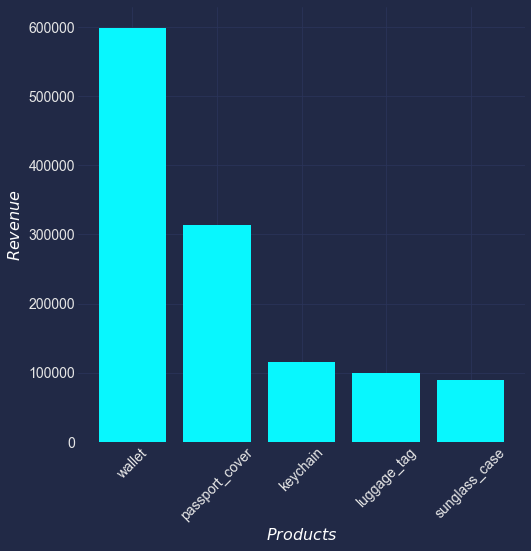

In [106]:
fig_dims = (8,8 )
fig, ax = plt.subplots(figsize=fig_dims)
plt.style.use("dark_background")
plt.style.use("cyberpunk")

font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

Top5 = Top5.sort_values(by = 'Tot', ascending=False)
plt.bar(Top5['product'], Top5['Tot'])
plt.xticks(rotation = 45, fontsize = 14)
plt.xlabel(r'$Products$', fontdict = font)
plt.ylabel(r'$Revenue$ ', fontdict = font)
plt.yticks(fontsize = 14)

mplcyberpunk.add_glow_effects()
plt.show()

In [19]:
x = range(1,6)

In [20]:
print(x)

range(1, 6)


In [35]:
x = np.arange(12)

In [36]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [37]:
x[3:]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [40]:
np.arange(len(x[3:]))+3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])